In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as py    
import pandas as pd 

In [2]:
# Importing the dataset  
dataset = pd.read_csv('Mall_Customers.csv') 

In [3]:
x = dataset.iloc[:, [3, 4]].values 

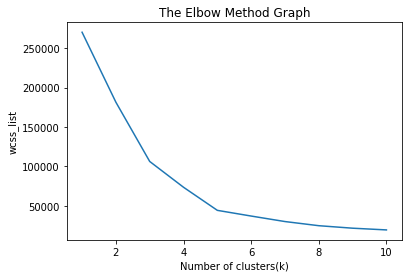

In [4]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  

#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
py.plot(range(1, 11), wcss_list)  
py.title('The Elbow Method Graph')  
py.xlabel('Number of clusters(k)')  
py.ylabel('wcss_list')  
py.show() 

In [5]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)
labels = kmeans.labels_

In [6]:
from sklearn import metrics
print(metrics.silhouette_score(x, labels, metric='euclidean'))

0.553931997444648


In [7]:
print(metrics.calinski_harabasz_score(x, labels))

247.35899338037282


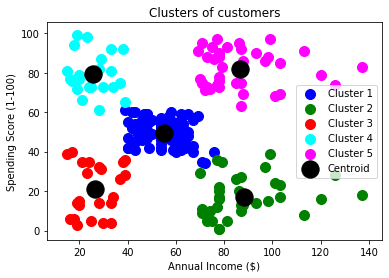

In [16]:
#visulaizing the clusters  
py.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
py.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  

py.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
py.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  

py.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
py.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroid')   

py.title('Clusters of customers')  
py.xlabel('Annual Income ($)')  
py.ylabel('Spending Score (1-100)')  
py.legend()  
py.show() 